# House Price Prediction Model
this project is based on californea housing dataset and have used the linear regression

## importing libraries and modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error
from sklearn.datasets import fetch_california_housing

## Performing EDA on data set

In [5]:
california=fetch_california_housing(as_frame=True)
df=california.frame
df['MedHouseVal']=california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.size

185760

In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


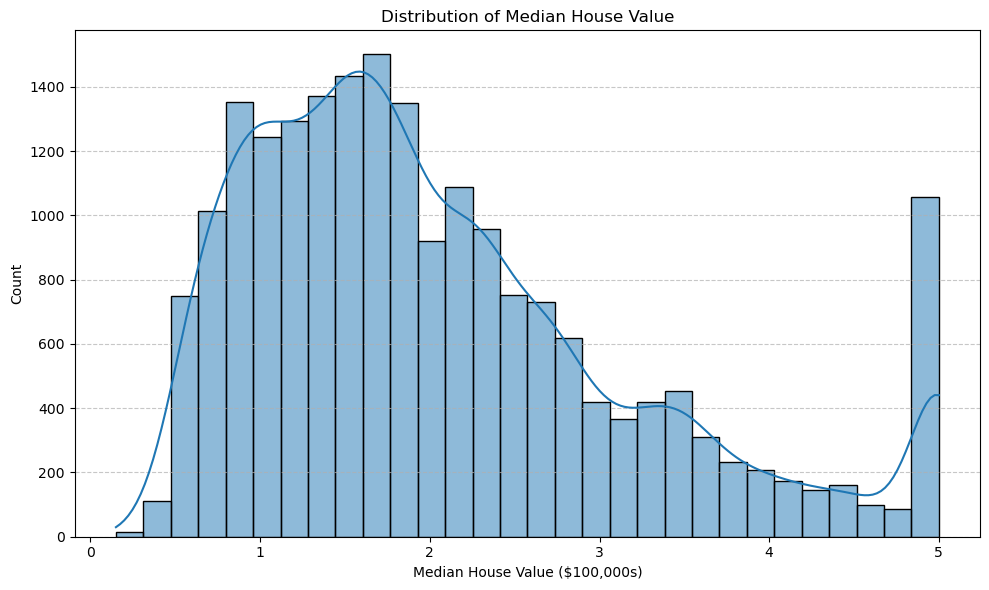

In [20]:
#visaulizing different factors so that we can have in depth knowledge about the datset
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../plots/Distribution_of_Median_House_Values.png',dpi=300,bbox_inches='tight')
plt.show()

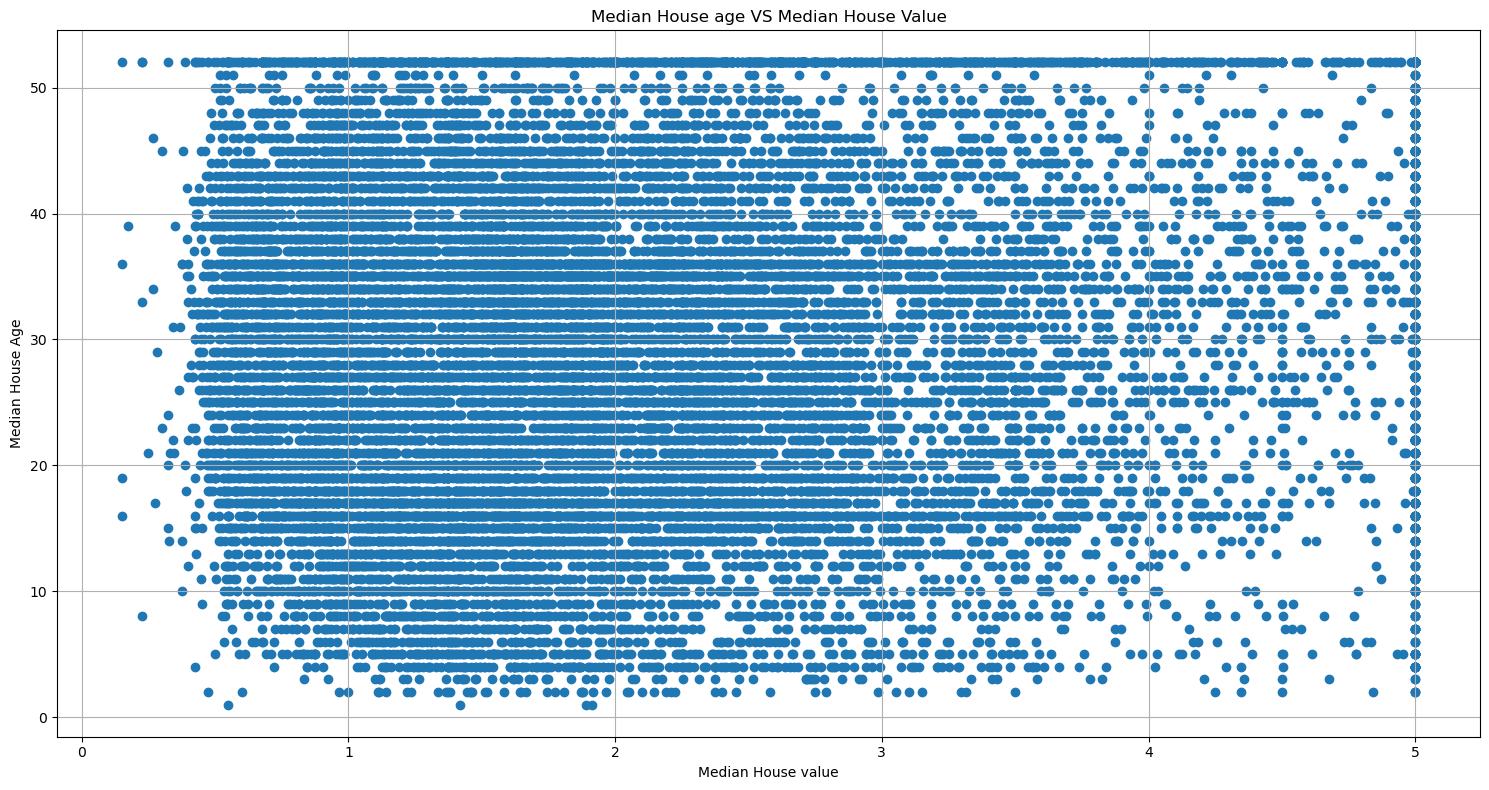

In [21]:
x=df['MedHouseVal']
y=df['HouseAge']
plt.figure(figsize=(15,8))
plt.scatter(x,y,alpha=1)
plt.title('Median House age VS Median House Value')
plt.xlabel('Median House value')
plt.ylabel('Median House Age')
plt.tight_layout()
plt.grid()
plt.savefig('../plots/Median_house_age.png',dpi=300,bbox_inches='tight')
plt.show()

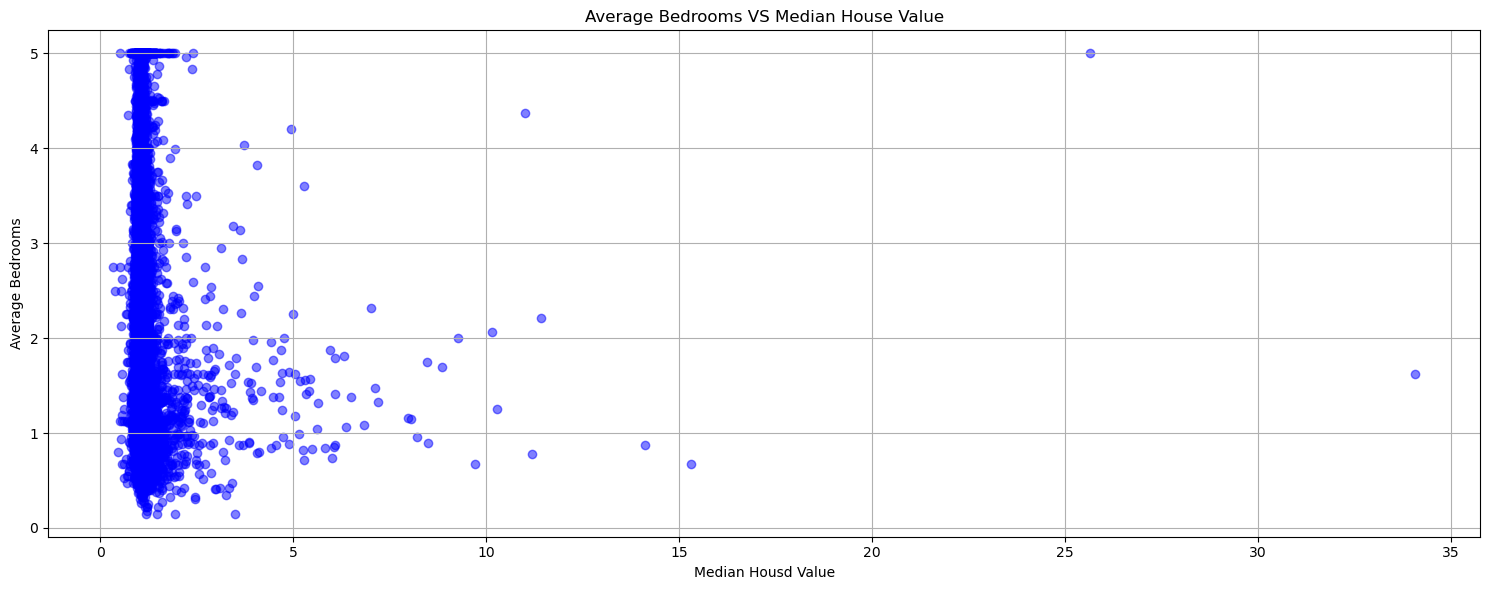

In [22]:
x=df['AveBedrms']
y=df['MedHouseVal']
plt.figure(figsize=(15,6))
plt.title('Average Bedrooms VS Median House Value')
plt.xlabel('Median Housd Value')
plt.ylabel('Average Bedrooms')
plt.scatter(x,y,color='blue', alpha=0.5)
plt.tight_layout()
plt.grid()
plt.savefig('../plots/Avg_bedrooms.png',dpi=300,bbox_inches='tight')
plt.show()

### Making Dataset ready to train the model

In [ ]:
# droped the median house value column from the dataset as it is the target variable
x_train,x_test,y_train,y_test=train_test_split(df.drop('MedHouseVal',axis=1),df['MedHouseVal'],test_size=0.2,random_state=42)


### feeding the data into model

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [10]:
predict=model.predict(x_test)

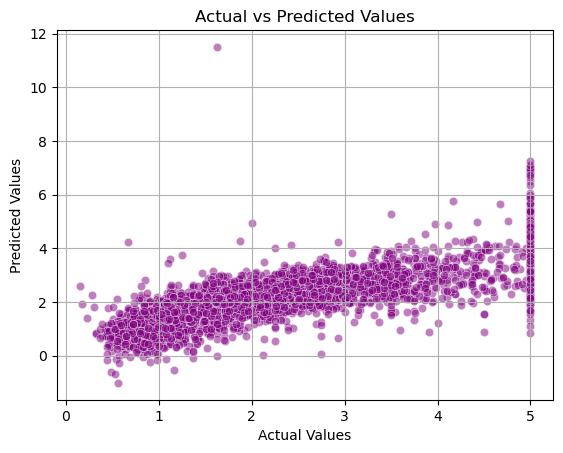

In [15]:
sns.scatterplot(x=y_test, y=predict, color="purple", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid()
plt.show()



## Plotting actual vs predicted values along with the regression line

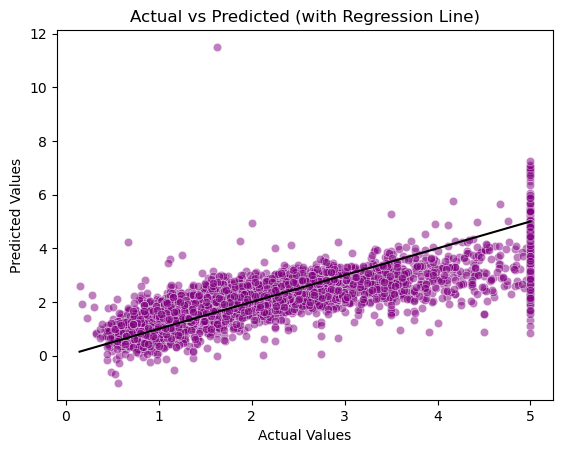

In [17]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
sns.scatterplot(x='Actual', y='Predicted', data=df_pred, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black")  # diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (with Regression Line)")
plt.show()


### error evaluation of the model

In [19]:
# Predictions
y_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔹 Linear Regression Evaluation")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


🔹 Linear Regression Evaluation
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R² Score: 0.58
